In this study we uncover the effects and interactions of procedural changes made by the company to decrease the level of denied claims. The measurement periods in question are the first and second half of calendar year 2016. We are tasked with uncovering the nature of the implementation: whether it targeted denial types, insurance carriers, service lines or claims by dollar amount - and possibly a combination of these.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings
import seaborn as sbs

A preview of the raw dataset. Here, you see that 
 - 'month of service' is nearly qualitative 
 - 'Denied Amount' is continuous for all intents and purposes
 - 'Insurance Name' is categorical
 - 'Service Line' is Categorical
 - 'Denial Type' is Categorical

In [2]:
df=pd.read_excel('C:/Users/callejal/Documents/hr-master/Flatiron_Analyst_Case_Study_(2).xlsx')
#df=pd.read_excel('/home/lechuza/Documents/hr/Flatiron_Analyst_Case_Study_(2).xlsx')
df.head()

,Month of Service,Denied Amount,Insurance Name,Service Line,Denial Type
0,7,31000,Aetna,MedOnc,Authorization
1,9,11000,Medicaid,Radiology,Credentialing
2,6,5000,UHC,MedOnc,Timely Filing
3,8,13000,Medicaid,E&M,Additional Information
4,5,39000,HIP,Labs,Coding


Note: the data shows one half of the story. Not provided is information on these factors across sucessful and denied claims. In effect, I am provided with a carve-out of the data. One reprecussion is lack of insight into relative proportion of claims to denials filed to a particular carrier or for a particular service line. Thus we can only make recommendations from one side of the dataset.

### High level statistics
 - Frequency of denials for the year by service line and denial type - frequency table and perhaps a heat map
 - Frequency of denials for the year broken out by service line and period - graphics and numeric data
 - Same as above but in dollars
 - provide a ranking for each category in both studies: entire year and by half
 
### Provide some insight into the business. 
Claims are compiled and submitted in a hybrid manual/automated process using our firm's proprietary software. Once metadata on the procedure/service line is entered, our software accesses the database to pull information on the patient's insurance provider. Internally, meta data and individualized workflows are executed according to the provider.

The client has not looked at their 2016 denials data; however a change in billing processing was enacted at the midpoint of the year and had a dramatic effect on billing: Total dollars denied decreased significantly, while number of denials stayed by-and-large stable. Potentially, management may have been operating under a trade-off rubric where they opted to improve one portion of their billing system at the expense of another. We will look at specifically what factors among service line, denial type and insurance carrier and subfactors were leveraged, what was impacted and make recommendations following the firm's preference towards recouping dollars over minimizing denials.

Total number of denials for 2016, first half 2016 and 2016: 

In [4]:
#splitting dataset into first and second half of year
first_half=df.loc[df['Month of Service'] <7,:]
second_half=df.loc[df['Month of Service'] >6,:]

half_sums=np.array([sum(first_half['Denied Amount']),sum(second_half['Denied Amount'])])
half_counts=np.array([len(first_half['Denied Amount']),len(second_half['Denied Amount'])])

Total dollar denials for 2016, first half 2016 and 2016: $75,907,000; split by $40,906,000 in first half and $35,001,000 - a decrease of 14.4%. However, there was only a marginal decrease of 1.3% in the number of denied claims.

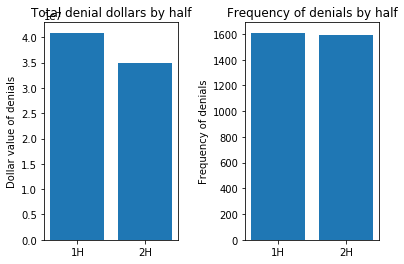

In [7]:
plt.subplot(121)
plt.bar([1,2],half_sums)
#plt.xticks(np.arange(1,len(dt_d1)+1),np.array(dt_d1.index),rotation=90.0)
plt.xticks([1,2],np.array(['1H','2H']))
plt.title('Total denial dollars by half')
plt.ylabel('Dollar value of denials')

plt.subplot(122)
plt.bar([1,2],half_counts)
plt.xticks([1,2],np.array(['1H','2H']))
plt.ylabel('Frequency of denials')
plt.title('Frequency of denials by half')
plt.subplots_adjust(wspace=.5)
plt.show()
plt.close()

The implementation served to reduce total dollars denied, but the decline in frequency of denials did not see the same level of change. However, the impact was not universal across the three factors. The dollar impact reverberated heterogenously across factors in their billing practices. We peer into those next.

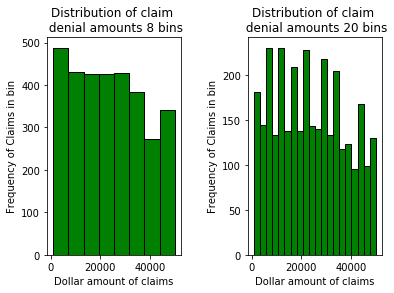

In [5]:
#bins=min(df['Denied Amount'])
plt.close()
ax1=plt.subplot(121)
plt.hist(df['Denied Amount'],bins=8,density=False,color='green',edgecolor='black')
plt.title('Distribution of claim \n denial amounts 8 bins')
plt.xlabel('Dollar amount of claims')
plt.ylabel('Frequency of Claims in bin')

plt.subplot(122)
plt.hist(df['Denied Amount'],bins=20,density=False,color='green',edgecolor='black')
plt.title('Distribution of claim \n denial amounts 20 bins')
plt.xlabel('Dollar amount of claims')
plt.ylabel('Frequency of Claims in bin')
plt.subplots_adjust(wspace=.5)

plt.show()
plt.close()

The above graphs displays the semi-uniform distribution of claim sizes across periods. Below we plot hisotgrams for each period separately.

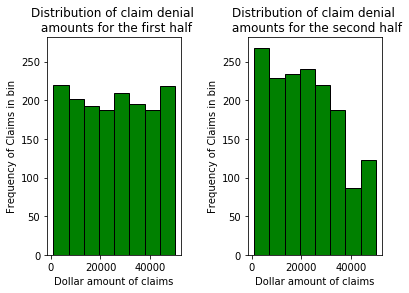

In [6]:
plt.close()
ax2=plt.subplot(122)
plt.hist(second_half['Denied Amount'],bins=8,density=False,color='green',edgecolor='black')
plt.title('Distribution of claim denial \n amounts for the second half')
plt.xlabel('Dollar amount of claims')
plt.ylabel('Frequency of Claims in bin')

plt.subplot(121,sharey=ax2)
plt.hist(first_half['Denied Amount'],bins=8,density=False,color='green',edgecolor='black')
plt.title('Distribution of claim denial \n amounts for the first half')
plt.xlabel('Dollar amount of claims')
plt.ylabel('Frequency of Claims in bin')
plt.subplots_adjust(wspace=.5)
plt.show()

There was a significant decrease in claims over $35K, while those under that amount generally saw increases. 

In [ ]:
#create dataframe of frequencies of the variables I want to plot
#will need to sort the series by index - alphabetical order
dt_1=first_half['Denial Type'].value_counts()
dt_2=second_half['Denial Type'].value_counts()

dt_d1=first_half.groupby('Denial Type').apply(lambda x: sum(x['Denied Amount']))
dt_d2=second_half.groupby('Denial Type').apply(lambda x: sum(x['Denied Amount']))
#sort both series and store as such

#sort these series
dt_1.sort_index(inplace=True)
dt_2.sort_index(inplace=True)

Plot denial types for first and second half of year

In [ ]:
plt.close()
ax1=plt.subplot(221)
plt.bar(np.arange(1,len(dt_1)+1),dt_1.values)
ax1.set_title('Frequency of denied claims \nby denial type First Half of year')
plt.xticks(np.arange(1,len(dt_1)+1),np.array(dt_1.index),rotation=90.0)
#plt.figure(num=1,figsize=(5,1))

ax2=plt.subplot(222,sharey=ax1,sharex=ax1)
plt.bar(np.arange(1,len(dt_2)+1),dt_2.values,align='center')
ax2.set_title('Second Half of year')
plt.xticks(np.arange(1,len(dt_2)+1),np.array(dt_2.index),rotation=90.0)
#plt.figure(num=2,figsize=(5,1))

ax3=plt.subplot(223)
plt.bar(np.arange(1,len(dt_d1)+1),dt_d1.values,align='center')
ax2.set_title('Second Half of year')
plt.xticks(np.arange(1,len(dt_d1)+1),np.array(dt_d1.index),rotation=90.0)
#plt.figure(num=3,figsize=(5,5))

ax4=plt.subplot(224,sharey=ax3,sharex=ax3)
plt.bar(np.arange(1,len(dt_d2)+1),dt_d2.values,align='center')
ax2.set_title('Second Half of year')
plt.xticks(np.arange(1,len(dt_d2)+1),np.array(dt_d2.index),rotation=90.0)
#plt.figure(num=4,figsize=(5,1))

#plt.tight_layout() <- can't use, because it reduces the image sizes to the point where diminishing legibility
plt.subplots_adjust(wspace=.5)
plt.show()
plt.close()

We note that denials increased for all types save for "Authorization", "Coding" and "Credentialing". Later, we do a deeper dive to check the distribution across component service lines for each of these claims using a rate of change metric.

Nominal dollar amount of denials by carrier.

In [ ]:
insurance_sums_first=first_half.groupby('Insurance Name').apply(lambda x: sum(x['Denied Amount']))
insurance_sums_second=second_half.groupby('Insurance Name').apply(lambda x: sum(x['Denied Amount']))

In [ ]:
#it would be nice to show gridlines
plt.close()
ax1=plt.subplot(121)
plt.bar(np.arange(1,len(insurance_sums_first)+1),insurance_sums_first.values)
plt.xticks(np.arange(1,len(insurance_sums_first)+1),np.array(insurance_sums_first.index),rotation=70.0)
plt.ylabel('Dollar Sum of Denials')
plt.title('Cumulate Sum of Denials per \n Insurance Provider - First Half')


ax2=plt.subplot(122, sharey=ax1)
plt.bar(np.arange(1,len(insurance_sums_second)+1),insurance_sums_second.values)
plt.xticks(np.arange(1,len(insurance_sums_second)+1),np.array(insurance_sums_second.index),rotation=90.0)
plt.title('Cumulate Sum of Denials per \n Insurance Provider - Second Half')
plt.subplots_adjust(wspace=.6)
#plt.tight_layout()
plt.show()

What is the concentration of these carriers across service line and denial type

In [ ]:
#run proportional study... 
#in_dt_1=first_half.groupby(['Insurance Name','Denial Type']).apply(len)
#in_dt_2=second_half.groupby(['Insurance Name','Denial Type']).apply(len)

pd.crosstab(first_half['Insurance Name'],first_half['Denial Type']).apply(lambda x: x/sum(x),axis=1)

In [ ]:
pd.crosstab(second_half['Insurance Name'],second_half['Denial Type']).apply(lambda x: x/sum(x),axis=1)
#proportions table with calcs along the column axis

In [ ]:
pd.crosstab(first_half['Insurance Name'],first_half['Service Line']).apply(lambda x: x/sum(x),axis=1)

In [ ]:
pd.crosstab(second_half['Insurance Name'],second_half['Service Line']).apply(lambda x: x/sum(x),axis=1)

The difference as a proportion of service line to insurance carrier are tame. The interaction between service line and insurance is subdued, but will be investigated at the last layer of our analysis.

We already start to see some notable differences between the two periods in the array of visuals above:
1. Cumulative denials fell dramatically for all insurance carriers, save for BCBS, Medicaid and Medicare
2. Fewer denials of less than $35K

We can drill down to see whether there is a level among the Service Line and Denial Type factors that is prevalent in the subset of carriers. Perhaps a 'denial type' or 'service line' is more significantly prevalent in one of the groups over the others. If not, we can try the study from a different perspective: Beginning the analysis from the denial types, then proceeding through servie line, and if need be, insurance carriers.  

In [ ]:
service_sums_first=first_half.groupby('Service Line').apply(lambda x: sum(x['Denied Amount']))
service_sums_second=second_half.groupby('Service Line').apply(lambda x: sum(x['Denied Amount']))

We concentrate on Denial Types for now. We want to gauge the change in dollar denial amounts when plotting denial types along with service line. Below we plot a heat map with the quantity being the ratio of total dollars denied by combination of service line and denial type. Positive ratios mean that the total denied dollars increased in the second half and decimals signal a decline.

In [ ]:
g1=first_half.groupby(['Denial Type','Service Line']).apply(lambda x: sum(x['Denied Amount']))
g2=second_half.groupby(['Denial Type','Service Line']).apply(lambda x: sum(x['Denied Amount']))
#run the function on frequency
g1_l=first_half.groupby(['Denial Type','Service Line']).apply(len)
g2_l=second_half.groupby(['Denial Type','Service Line']).apply(len)

In [ ]:
#unpack the multi index, merge, then apply a function to calculate the h/h difference change and rate of change
def innerFunction(rowwise):
    x=rowwise.tolist()
    #dic={'prop':x[1]/x[0],'diff':x[1]-x[0]}
    #dic=x[1]/x[0]
    dic=(x[1]/x[0],x[1]-x[0])
    return(dic)
#merge on multi index
def merge_calc(df1,df2):
    #df is a dataframe
    df=pd.concat([df1,df2],axis=1)
    final=df.apply(innerFunction,axis=1)
    return(final)

test=merge_calc(g1,g2)
test_l=merge_calc(g1_l,g2_l)

#now we convert to an appropriate dataframe and plot a heatmap
test.columns=['proportion','difference']
test.reset_index(inplace=True)
test1=test.pivot('Service Line','Denial Type','proportion')

test_l.columns=['proportion','difference']
test_l.reset_index(inplace=True)
test_l1=test_l.pivot('Service Line','Denial Type','proportion')

In [ ]:
plt.close()
ax=sbs.heatmap(test1,annot=True)
ax.set_title('Ratio of Cumulative Sums from half to half')
#flights = sbs.load_dataset("flights")
#flights = flights.pivot("month", "year", "passengers")

#print(flights.head())
plt.show()
plt.close()

From the heatmap, we see that possible implementations of new "Coding", "Authorization" and "Credentialing" practices was especially effective at reducing claims across service lines when measured on ratio of cumulative dollar sum. This impact is notably effective in the service lines of 'RadOnc' and 'Radiology'.

Areas of concern: The procedural enhancements were least effective at reducing claims for "E&M", "Labs" and "MedOnc"; moreover, these three service lines experienced the highest growth in claims

Plot another HeatMap but with total absolute dollars difference half-over-half.

In [ ]:
test2=test.pivot('Service Line','Denial Type','difference')
plt.close()
ax=sbs.heatmap(test2,annot=False)
ax.set_title('Nominal Difference in Cumulative Sums from half to half')
plt.show()
plt.close()

From the above, we can nearly rest assured that rates of change associate closely with changes as measured by nominal differences in cumulative denial dollars.

In [ ]:
plt.close()
ax=sbs.heatmap(test_l1,annot=True)
ax.set_title('Ratios of frequency of denials from half to half')
plt.show()
plt.close()

We glean from the above that the implementation impacted RadOnc and Radiology when interacted with Authorization, Coding and Credentialing. Conversely, an implementation greatly augmented denials for Labs and MedOnc. MedOnc is especially concerning because of the large dollar impact sustained by the increase in denials.

Below we re-do the study but starting starting with service lines.

In [ ]:
plt.close()

ax1=plt.subplot(121)
plt.bar(np.arange(1,len(service_sums_first)+1),service_sums_first.values)
plt.xticks(np.arange(1,len(service_sums_first)+1),np.array(service_sums_first.index),rotation=45.0)
plt.title('Cumulate Sum of Denials per \n Service Line - First Half')
plt.yticks(np.arange(0,max(service_sums_first.values)+8000,450000))
ax1.grid(color='r', linestyle='-', linewidth=.5, axis='y')


ax2=plt.subplot(122,sharey=ax1)
plt.bar(np.arange(1,len(service_sums_second)+1),service_sums_second.values)
plt.xticks(np.arange(1,len(service_sums_second)+1),np.array(service_sums_second.index),rotation=45.0)
plt.title('Cumulate Sum of Denials per \n Service Line - Second Half')
plt.yticks(np.arange(0,max(service_sums_second.values)+8000,450000))
ax2.grid(color='r', linestyle='-', linewidth=.5, axis='y')
plt.subplots_adjust(wspace=.5)

plt.show()

The h/h rate of change for each service line indicate that the last two had the most dramatic decline and absolute change, while 'MedOnc' had the largest increase. This confirms the drop we saw in these lines when taking the perspective of a 'denial type' implementation. It is possible that the firm focused on Service Lines and not denial types. We have to uncover the reason why denials decreased more for some service lines than others for "Coding", "Credentialing" and "Authorization".

Make a proportions table for service line and denial type... if the proportions stayed flat h/h, then we know that the firm targeted the service line; if not, then we know they targeted particular denial types.

In [ ]:
cross_1=pd.crosstab(first_half['Service Line'],first_half['Denial Type']).apply(lambda x: x/sum(x),axis=1)
cross_2=pd.crosstab(second_half['Service Line'],second_half['Denial Type']).apply(lambda x: x/sum(x),axis=1)

plt.close()
fig=plt.figure(figsize=(10, 10), dpi= 62, facecolor='w', edgecolor='k')
plt.subplot(121)
ax=sbs.heatmap(cross_1,annot=True)
#ax.set_title('Ratios of frequency of denials from half to half')
plt.subplot(122)
ax=sbs.heatmap(cross_2,annot=True)
plt.show()
plt.close()

### Capture the distribution of rate of change of frequency of denials when:
1. holding denial type constant and iterating through the combinations of service line and insurance
2. holding denial type and service line combination constant and iterating through insurance 

Number 1 yields 8x45
Number 2 yields 40x9
service line: 5; denial type: 8; insurance: 9

In [ ]:
#create one dictionary per independent variable (in some cases can be a combination of two variables, which will be encapsulatd in an tuple)
#dependentArray is a list... this function needs to be customized because of shortcomings in dataframe indexing
def getMeasure(df,independent_array,dependent_array):
    #hard coding the index-column association
    #insert/place result set in either a dictionary, pandas dataframe
    result_set_dict={}
    #a dictionary of dictionary
    result_set_dict.setdefault(independent_array,{})
    
    #store results in an array - converting the series to an array
    results_array=np.array(df.loc[(df['Denial Type'] == independent_array[0]) & (df['Service Line'] == dependent_array[0]) & 
        (df['Insurance Name'] == dependent_array[1]),'Denied Amount'])
    
    try:
        result_set_dict[independent_array]['mean']=np.mean(results_array)
        result_set_dict[independent_array]['freq']=results_array.size
        result_set_dict[independent_array]['cum_sum']=np.sum(results_array)
        result_set_dict[independent_array]['combo']=dependent_array
    except RunTimeWarning:
        result_set_dict[independent_array]['mean']=None
        
    return(result_set_dict)

In [ ]:
#configure the combinations of the dependent variable
ins=df['Insurance Name'].unique()
service=df['Service Line'].unique()
denial=df['Denial Type'].unique()
lista=[service,ins]
g=itertools.product(*lista)
combo_list_one=list(g)

print(type(denial))

In [ ]:
result_set1=[getMeasure(first_half,(g,),i) for g in denial for i in combo_list_one]
result_set2=[getMeasure(second_half,(g,),i) for g in denial for i in combo_list_one]

re-do the above function and have it conform to the one on flatiron.ipynb, then unwind the dataframe and apply analytics; do it again for the combo independent.

In [ ]:
def nested_dic(dic_list):
    #convert a nested dictionary into a dataframe
    tuple_list=[]
    values_list=[]
    for i in dic_list:
        for k,v in i.items():
            tuple_list.append(k)
            values_list.append(v)
    return((tuple_list,values_list))                       

In [ ]:
key_list,value_list=nested_dic(result_set1)
#from second_half dataframe
key_list2,value_list2=nested_dic(result_set2)

In [ ]:
#first_half dataframe
df1=pd.DataFrame.from_records(value_list,index=key_list)
#second_half dataframe
df2=pd.DataFrame.from_records(value_list2,index=key_list2)
#both dataframes have similar structure including indexes and combo field, which allows for merging/matching

In [ ]:
#convert indexes of both dataframes to columns, then merge
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

In [ ]:
#this function is designed to be 'applied' to one of the dataframes... apply this to the first_half df
def lookUpDifference(x,df):
    dicty={}
#    dicty.setdefault(x.name,{})
    #matched_row=df.loc[[x.name]].to_dict(orient='list') - legacy
    #returns a dataframe
    matched_row=df.loc[(df['combo']==x['combo']) & (df['index']==x['index']),:]
    dicty[x['index'][0]]={'mean_diff':matched_row['mean']-x['mean'],
    'cum_sum_diff':matched_row['cum_sum']-x['cum_sum'],
    'freq_dif':matched_row['freq']-x['freq'],
    'mean_prop':matched_row['mean']/x['mean'],
    'cum_sum_prop':matched_row['cum_sum']/x['cum_sum'],
    'freq_prop':matched_row['freq']/x['freq']}

    return(dicty)

In [ ]:
#apply to a DataFrame, which always returns a Series... in this case, a series of dictionaries
g=df1.apply(lookUpDifference,args=(df2,),axis=1)

In [ ]:
g_ma=g.as_matrix()

In [ ]:
def nested_dic(dic_list):
    #convert a nested dictionary into a dataframe
    tuple_list=[]
    values_list=[]
    for i in dic_list:
        for k,v in i.items():
            tuple_list.append(k)
            values_list.append(v)
    return((tuple_list,values_list))         

In [ ]:
key_last,value_last=nested_dic(g_ma)
df_la=pd.DataFrame.from_records(value_last,index=key_last)

In [ ]:
tutu=df_la.applymap(lambda x: x.values[0])

In [ ]:
tutu.reset_index(inplace=True)

In [ ]:
#tutu.replace([np.inf, -np.inf], np.nan,inplace=True)
sum(tutu.cum_sum_prop.isnull().values) #10 values are infinite... not bad
tutu.dropna(inplace=True,how='any')

Iterate through each permutation of index value and run stats on each field... can plot via a violin plot.

In [ ]:
#there are negative ratios in cum_sum_prop and freq_prop... that's illogical... investigate
tutu.iloc[:,1:].apply(min,axis=0)

In [ ]:
plt.close()
sbs.violinplot(x='index',y='cum_sum_prop',data=tutu,bw=.1)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='-',color='r')
plt.ylim([-2,10])
plt.show()

In [ ]:
plt.close()
sbs.violinplot(x='index',y='freq_prop',data=tutu,bw=.1)
plt.xticks(rotation=45)
plt.grid(color='r', linestyle='-', linewidth=.5, axis='y')
plt.ylim([-1,8])
plt.show()

The above graph displays the distribution of frequency ratio between the periods. The smaller the violin, the less the volatility in observed period-over-period denials across insurance carrier and service line in each particular denial type.

Last study looks at the interaction across the denial type and service line and iterating through insurance to gauge trends in denials for each carrier - in effect treating carrier as the dependent variable.

In [ ]:
lista=[denial,service]
g=itertools.product(*lista)
combo_list_two=list(g)

In [ ]:
def getMeasure2(df,independent_array,dependent_array):
    #re-do of the first version: in this case, there are two indepdent variables and one dependent, will change the indexing below
    result_set_dict={}
    #a dictionary of dictionary
    result_set_dict.setdefault(independent_array,{})
    
    #store results in an array - converting the series to an array
    results_array=np.array(df.loc[(df['Denial Type'] == independent_array[0]) 
                                  & (df['Service Line'] == independent_array[1]) & 
        (df['Insurance Name'] == dependent_array),'Denied Amount'])
    
    try:
        result_set_dict[independent_array]['mean']=np.mean(results_array)
        result_set_dict[independent_array]['freq']=results_array.size
        result_set_dict[independent_array]['cum_sum']=np.sum(results_array)
        result_set_dict[independent_array]['combo']=dependent_array
    except RunTimeWarning:
        result_set_dict[independent_array]['mean']=None
        
    return(result_set_dict)

In [ ]:
result_set12=[getMeasure2(first_half,i,g) for g in ins for i in combo_list_two]
result_set22=[getMeasure2(second_half,i,g) for g in ins for i in combo_list_two]

In [ ]:
key_list12,value_list12=nested_dic(result_set12)
#from second_half dataframe
key_list22,value_list22=nested_dic(result_set22)

In [ ]:
#first_half dataframe
df12=pd.DataFrame.from_records(value_list12,index=key_list12)
#second_half dataframe
df22=pd.DataFrame.from_records(value_list22,index=key_list22)
#both dataframes have similar structure including indexes and combo field, which allows for merging/matching
df12.reset_index(inplace=True)
df22.reset_index(inplace=True)

In [ ]:
def lookUpDifference2(x,df):
    dicty={}
#    dicty.setdefault(x.name,{})
    #matched_row=df.loc[[x.name]].to_dict(orient='list') - legacy
    #returns a dataframe
    matched_row=df.loc[(df['combo']==x['combo']) & (df['index']==x['index']),:]
    dicty[x['index']]={'mean_diff':matched_row['mean']-x['mean'],
    'cum_sum_diff':matched_row['cum_sum']-x['cum_sum'],
    'freq_dif':matched_row['freq']-x['freq'],
    'mean_prop':matched_row['mean']/x['mean'],
    'cum_sum_prop':matched_row['cum_sum']/x['cum_sum'],
    'freq_prop':matched_row['freq']/x['freq']}

    return(dicty)

In [ ]:
#apply to a DataFrame, which always returns a Series... in this case, a series of dictionaries
jg=df12.apply(lookUpDifference2,args=(df22,),axis=1)

In [ ]:
key_last3,value_last3=nested_dic(jg)
df3=pd.DataFrame.from_records(value_last3,index=key_last3)

In [ ]:
tutu3=df3.applymap(lambda x: x.values[0])
tutu3.reset_index(inplace=True)

In [ ]:
tutu3.replace([np.inf, -np.inf], np.nan,inplace=True)
tutu3.dropna(inplace=True,how='any')

In [ ]:
plt.close()
sbs.violinplot(x='index',y='freq_prop',data=tutu3,bw=.1)
plt.xticks(rotation=45)
plt.grid(color='r', linestyle='-', linewidth=.5, axis='y')
plt.ylim([-1,8])
plt.show()

The violin graph above reveals that distribution of proportional change of frequency of denials is not constant across combinations of denial types and service line. Hence, there is an interaction. A significant interaction will be expressed through non-uniform distributions.

Lastly, we'll look at insurance carriers and determine whether there exists a trend across dependent variables denials and service line, and finally, we'll combine insurance carrier with service line to determine whether there is an interaction that uniformally impaceted denials.

In [ ]:
gi1=first_half.groupby(['Denial Type','Insurance Name']).apply(lambda x: sum(x['Denied Amount']))
gi2=second_half.groupby(['Denial Type','Insurance Name']).apply(lambda x: sum(x['Denied Amount']))
#run the function on frequency
gi_l=first_half.groupby(['Denial Type','Insurance Name']).apply(len)
gi2_l=second_half.groupby(['Denial Type','Insurance Name']).apply(len)

In [ ]:
testi=merge_calc(gi1,gi2)
test_i=merge_calc(gi_l,gi2_l)

In [ ]:
#now we convert to an appropriate dataframe and plot a heatmap
testi.columns=['proportion','difference']
testi.reset_index(inplace=True)
testi1=testi.pivot('Insurance Name','Denial Type','proportion')

test_i.columns=['proportion','difference']
test_i.reset_index(inplace=True)
test_i1=test_i.pivot('Insurance Name','Denial Type','proportion')

In [ ]:
plt.close()
ax=sbs.heatmap(test_i1,annot=True)
ax.set_title('Ratios of frequency of denials from half to half')
plt.show()
plt.close()

Let's look at the proportions by service line. Recall that RadOnc and Radilogy decreased the most h/h. What was the distribution of carrier for those two lines?

In [ ]:
pd.crosstab(first_half['Service Line'],first_half['Insurance Name']).apply(lambda x: x/sum(x),axis=1)
#this style takes proportions across rows... in this case - service line

In [ ]:
pd.crosstab(second_half['Service Line'],second_half['Insurance Name']).apply(lambda x: x/sum(x),axis=1)

The above shows that despite the improvement in RadOnc and MedOnc on the whole, proportions of denials shot up for Medicare, Medicaid and BCBS on those lines. There was a consistent deterioration in relative performance on those carriers across the board.

The crux of our discoveries showed three patterns:
1. Steady improvement as measured by number of denials across Authorization, Coding, and ...
2. A similar consistent improvement as measured by number of denials across service lines of MedOnc and Rad Onc
3. A relative deterioration and increase of denial proportions across all service lines for BCBS, Medicare and Medicaid.